In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Đọc file csv và gắng index với giá Close
df = pd.read_csv('D:/PTDLKD/ProjectData/dataset/KEY.csv')
df1 = df.reset_index()['Close']
df1.describe()

count    3375.000000
mean       14.278945
std         4.808535
min         5.710000
25%         9.885000
50%        13.640000
75%        18.290001
max        27.010000
Name: Close, dtype: float64

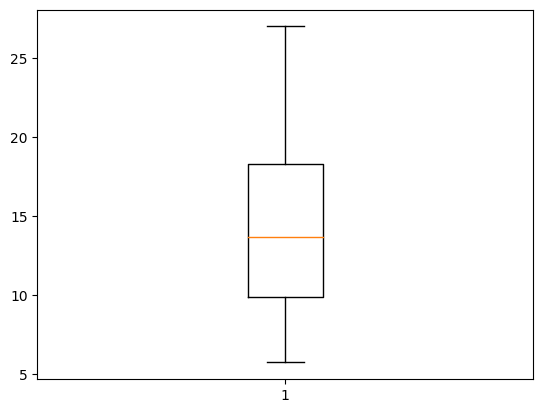

In [3]:
# Tạo plot
plt.boxplot(df1)
plt.show()

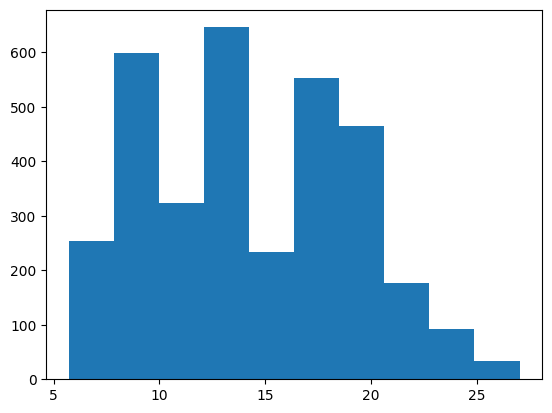

In [4]:
# Tạo Histogram
plt.hist(df1)
plt.show()

In [5]:
# Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))


In [6]:
# Chia train/test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [7]:
# Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 277
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [9]:
# Fit mô hình GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [10]:
# Dự báo dữ liệu
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val

train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))
y_test = scaler.inverse_transform(ytest.reshape(-1, 1))
y_val = scaler.inverse_transform(yval.reshape(-1, 1))

In [12]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1) )
yval = scaler.inverse_transform(yval.reshape(-1,1) )

In [13]:
# 12. Đánh giá độ chính xác thuật toán
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mae = np.mean(np.abs(y_pred - ytest))
valid_mape = np.mean(np.abs((y_pred_val - yval) / yval)) * 100
test_mape = np.mean(np.abs((y_pred - ytest) / ytest)) * 100
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 0.676006005160308
Testing RMSE: 1.456846059459894
Validation MAE: 0.42562391235433594
Testing MAE: 0.9319170444195024
Validation MAPE: 3.7509647082606423
Testing MAPE: 4.471424483845171


In [14]:
# Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=277
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps))
        #print(x_input)
        yhat = model.predict(x_input)
        print("{} day output {}".format(i,yhat))
    
        temp_input.append(yhat[0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.70046944 0.66666667 0.6643193  0.67230052 0.63849761 0.64600934
 0.65727695 0.68403761 0.66056343 0.64929582 0.63239437 0.62018779
 0.60422535 0.60187798 0.60610333 0.60187798 0.63427225 0.60093897
 0.59389676 0.59201878 0.62159629 0.62629103 0.64835681 0.66713615
 0.66244131 0.66901404 0.64741784 0.66713615 0.65399056 0.65492958
 0.65774643 0.63896714 0.60751174 0.56619718 0.54835676 0.55539911
 0.56478873 0.53380282 0.54225352 0.55446009 0.54929577 0.53004695
 0.56901408 0.55633798 0.55868549 0.55305164 0.54084507 0.55352113
 0.54788728 0.54178404 0.55915498 0.55305164 0.54929577 0.54460089
 0.52957746 0.51267601 0.55446009 0.56291085 0.57934268 0.58356803
 0.58920188 0.57887329 0.58169014 0.55962437 0.57793427 0.57276995
 0.59107977 0.59061038 0.57605634 0.58215967 0.56478873 0.57981216
 0.58403756 0.58215967 0.61784042 0.63380277 0.64319249 0.64507047
 0.66056343 0.64460099 0.65399056 0.63802812 0.61032859 0.61314554
 0.61220657 0.62676052 0.5971831  0.57746479 0.570

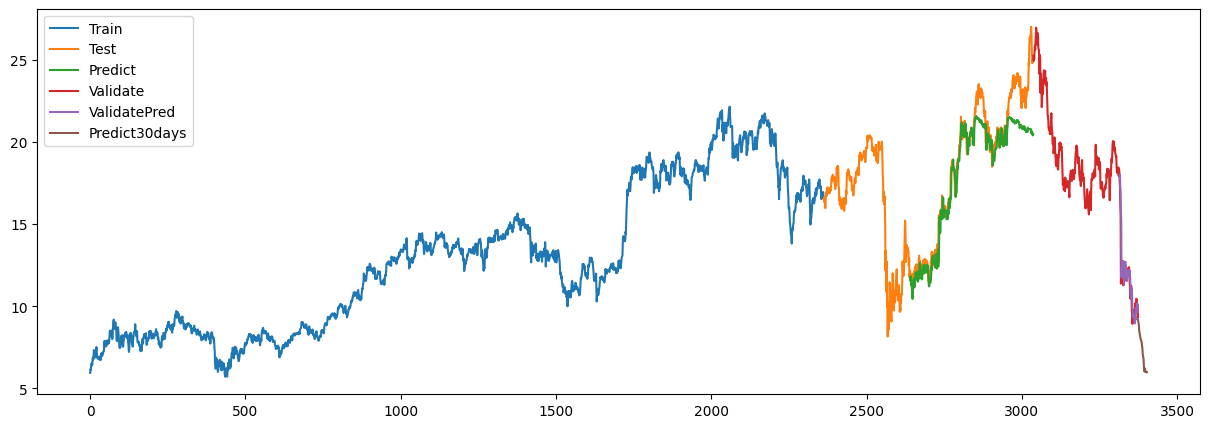

In [15]:
# Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.subplots(figsize=(15, 5))
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+278, stop=train_size+test_size, step=1)
plt.plot(test_data_index[:len(y_pred)], y_pred)
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+278, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index[:len(y_pred)],y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index[:len(y_pred)], scaler.inverse_transform(np.reshape(lst_output, (-1, 1))))
plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred', 'Predict30days'])
plt.show()

In [16]:
lst_output_2d = np.array(lst_output).reshape(-1, 1)
scaler.inverse_transform(lst_output_2d)

array([[9.2046488 ],
       [9.04674931],
       [8.96994357],
       [8.81110783],
       [8.50294403],
       [8.39178862],
       [8.28181303],
       [8.16135305],
       [8.05721047],
       [7.95886649],
       [7.93290288],
       [7.88729109],
       [7.77421683],
       [7.57297584],
       [7.50910836],
       [7.16050282],
       [6.99911341],
       [6.9058811 ],
       [6.77327583],
       [6.32944845],
       [6.12729795],
       [6.02704593],
       [6.2225191 ],
       [6.04595749],
       [6.06725059],
       [6.01208233],
       [5.98388692],
       [6.01068594],
       [5.99045677],
       [5.99045677]])